In [4]:
import pandas as pd
import numpy as np
import pickle
import math

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
def openArray(direc='output/GraphGen_TestSet/'):
    
    with open(f'{direc}nameList.pkl', 'rb') as f:
        nameList = pickle.load(f)
    with open(f'{direc}scoreList.pkl', 'rb') as f:
        scoreList = pickle.load(f)
        
    return nameList, scoreList

def extract_total_score(scoresList,regPlace=[],dictPlace=[2,5,8,10]):
    
    outList = []
    
    for x in scoresList:
        inner = []
        for y in range(len(x)):
            if y in regPlace:
                inner.append(x[y])
            if y in dictPlace:
                if y == 10:
                    inner.append(x[y]['total_score']/len(x[7]))
                if y == 8:
                    inner.append(x[y]['total_score']/len(x[7]))
                else:  
                    inner.append(x[y]['total_score']/len(x[y-1]))
        outList.append(inner)
        
    return outList

def extract_stats(scoresList,scPlace=[2],scorePlace=[2]):
    
    outList = []
    
    for x in scoresList:
        inner = []
        for y in range(len(x)):
            if y in scPlace:
                inner.append(x[y]['sc'])
            if y in scorePlace:  
                inner.append(x[y]['total_score']/len(x[y-1]))
                
        inner.append(len(x[1]))
        inner.append(x[3])
        outList.append(inner)
        
    return outList
    

labels=['name',#0
  'pred_seq_this_work','pred_scores_this_work','pred_time_this_work', #1,2,3
  'pred_seq_graphGen','pred_scores_graphGen','pred_time_graphGen', #4,5,6
  'actual_seq_graphGen','actual_scores_graphGen','actual_time_graphGen',#7,8,9
  'orig_scores'] #10

labels=['name',#0
  'pred_seq_this_work','pred_scores_this_work','pred_time_this_work', #1,2,3
  'actual_seq_graphGen','actual_scores_graphGen','actual_time_graphGen',#5,6,7
  'orig_scores'] #8

In [105]:
def make_dict(nameList,scoreList,removeExt=False):
    
    s = dict()
    
    for x in range(len(nameList)):
        if removeExt:
            name = nameList[x][:-4]
        else:
            name = nameList[x]
        s[name] = scoreList[x][2]['total_score']/len(scoreList[x][1])
        
    return s
    

In [107]:
dictPlace=[2]
nL, sL = openArray(direc='scores/gg_test_')
g = make_dict(nL,sL,removeExt=True)


In [110]:
dictPlace=[2]
nL, sL = openArray(direc='scores/og_test_')
o = make_dict(nL,sL,removeExt=True)


In [113]:
dictPlace=[2]
nL, sL = openArray(direc='scores/actual_test_')
a = make_dict(nL,sL,removeExt=False)

In [116]:
s = []
for x in g.keys():
    s.append([g[x],o[x],a[x]])

In [117]:
l2 = ['pred_str','og_str','actual']
df = pd.DataFrame(s,columns=l2)

In [118]:
df

,pred_str,og_str,actual
0,-2.366781,-2.278007,-2.760167
1,-2.612465,-1.925923,-2.599015
2,-2.467066,-1.935436,-2.512302
3,-2.221157,-1.765666,-2.550548
4,-2.673683,-2.220766,-2.815856
...,...,...,...
11546,-2.692339,-2.475121,-2.826446
11547,-2.480035,-2.079569,-2.534315
11548,-2.605460,-2.129420,-2.335940
11549,-2.513823,-2.093344,-2.638426


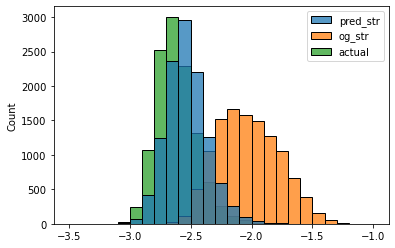

In [119]:
histp = sns.histplot(data=df,binrange=[-3.5,-1],binwidth=0.1)

In [ ]:
dfBeg = df[['original','pred_orig','actual']]
dfBeg.columns

In [8]:
dictPlace=[2,5,7]
nL, sL = openArray(direc='scores/test1_')
sL = extract_total_score(sL,dictPlace=dictPlace)
l2 = ['pred_str','actual','original']

TypeError: object of type 'float' has no len()

In [10]:
sL[0]

['0002182ba9e87d7b0d6b7d16b7001923_0001',
 'SLEELLEEARKLGVPPELLERVEELLKELEERGDPRREEVRRLLEEIVKIPDPEEARKLLEEAIK',
 {'fa_atr': -390.1797437126041,
  'fa_rep': 107.084412182707,
  'fa_sol': 322.8521570359772,
  'fa_intra_atr_xover4': -29.73483772026739,
  'fa_intra_rep_xover4': 33.322863649572426,
  'fa_intra_sol_xover4': 26.423346452905893,
  'lk_ball': 189.5905232380632,
  'lk_ball_iso': 438.1588331504614,
  'lk_ball_bridge': 1.7553026866085517,
  'lk_ball_bridge_uncpl': 11.722243817592018,
  'fa_elec': -139.48601870675876,
  'fa_intra_elec': -11.024397937149269,
  'pro_close': 0.5343866311071819,
  'hbond_sr_bb': -49.29611696121865,
  'hbond_lr_bb': -1.754172992980338,
  'hbond_bb_sc': -7.198299711051658,
  'hbond_sc': -10.260944580135419,
  'dslf_fa13': 0.0,
  'omega': 10.304751060777935,
  'fa_dun_dev': 12.553891011244719,
  'fa_dun_rot': 62.15238783318254,
  'fa_dun_semi': 86.74217843582248,
  'p_aa_pp': -21.801411144482174,
  'hxl_tors': 0.6018186954882362,
  'ref': -67.799092,
  'r

In [3]:
dictPlace=[2,5,8,10]
nL, sL = openArray(direc='scores/test1_')
sL = extract_total_score(sL,dictPlace=dictPlace)
l2 = ['pred_str','pred_orig','actual','original']

In [4]:
df = pd.DataFrame(sL,columns=l2)

In [5]:
dfBeg = df[['original','pred_orig','actual']]
dfBeg.columns

Index(['original', 'pred_orig', 'actual'], dtype='object')

In [6]:
dfBeg = dfBeg.rename(columns={"original": "reference set", "actual": "Reference Sequence:Relax", "pred_orig":"PredictSeq GG:Relax"})

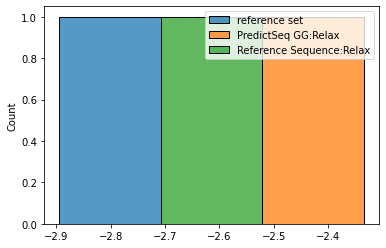

In [7]:
histp = sns.histplot(data=dfBeg)
# histp.figure.savefig(f'../Figures/GraphGen_Figure/test_predict_orig.png')
# histp.figure.savefig(f'../Figures/GraphGen_Figure/test_predict_orig.svg')

In [29]:
df = df.rename(columns={"pred_str":"PredictSeq 4H_GG","original": "reference set", "actual": "Reference Sequence:Relax", "pred_orig":"PredictSeqGG:Relax"})

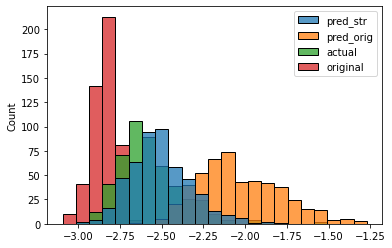

In [10]:
histp = sns.histplot(data=df)
# histp.figure.savefig(f'../Figures/GraphGen_Figure/test_predict.png')
# histp.figure.savefig(f'../Figures/GraphGen_Figure/test_predict.svg')

In [11]:
df['original'].median()

-2.834150803575287

In [12]:
df['actual'].median()

-2.6101171244488843

In [13]:
df['pred_str'].median()

-2.5235179457747723

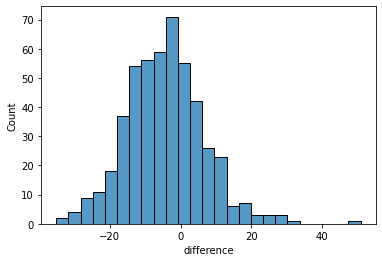

In [210]:
df['difference'] = df['actual']-df['pred_str']
his2 = sns.histplot(data=df['difference'])
his2.figure.savefig(f'../Figures/GraphGen_Figure/diff_predict.png')
his2.figure.savefig(f'../Figures/GraphGen_Figure/diff_predict.svg')

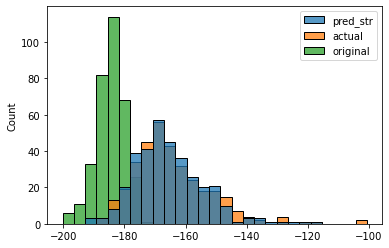

In [211]:
df2 = df.loc[df['difference']>-10]
his3=sns.histplot(data=df2[["pred_str", "actual","original"]])
his3.figure.savefig(f'../Figures/GraphGen_Figure/diff_remove_predict.png')
his3.figure.savefig(f'../Figures/GraphGen_Figure/diff_remove_predict.svg')

In [273]:
nL,sL = openArray(direc='output/278_GAN/t1/')

In [ ]:
tL = 
for x in sL:

In [274]:
sL[0]

['b100_build_phi_0_n0_phi_1_n0_phi_5_n0',
 'SVEEEFEERVRELRKRDPDEARKLEELLRLILELAGGDPRLVEELLRRLEELKKRLPPEEVIKVAEKLG',
 {'sc': 0.7387703061103821,
  'fa_atr': -409.3070678728057,
  'fa_rep': 99.84364962776587,
  'fa_sol': 353.84376104253295,
  'fa_intra_atr_xover4': -30.34613446148488,
  'fa_intra_rep_xover4': 31.56028699777713,
  'fa_intra_sol_xover4': 27.23532810342484,
  'lk_ball': 198.85438316121653,
  'lk_ball_iso': 473.3832219374224,
  'lk_ball_bridge': 1.597137435062304,
  'lk_ball_bridge_uncpl': 9.457626044863773,
  'fa_elec': -165.88225513118408,
  'fa_intra_elec': -11.745815936517523,
  'pro_close': 0.22188689168519937,
  'hbond_sr_bb': -59.305517532907366,
  'hbond_lr_bb': -1.184795447428463,
  'hbond_bb_sc': -5.119194324012371,
  'hbond_sc': -19.231106949554007,
  'dslf_fa13': 0.0,
  'omega': 12.253751346513997,
  'fa_dun_dev': 13.580596755665338,
  'fa_dun_rot': 60.91811173062355,
  'fa_dun_semi': 88.71439904401686,
  'p_aa_pp': -28.043848286006416,
  'hxl_tors': 0.6019266431

In [14]:
def get_time(iN):
    nL = []
    sL = []
    nL,sL = openArray(direc=iN)
    print(f'total struct: {len(sL)}')
    sL = extract_stats(sL,scPlace=[2],scorePlace=[2])
    b=[]
    for x in range(len(sL)):
        name = nL[x][0].split('_')
        num = int(name[0][1:])
        b.append([sL[x][0],sL[x][1],sL[x][2],sL[x][3],num,nL[x][0]])
        
    labels=['sc','score','len','time','num','name']
    df = pd.DataFrame(b,columns=labels)
    #his4 = sns.histplot(data=df[stat])
    
    total_time = df['time'].sum()
    
    med = df['time'].median()
    print(f'median time is {med}')
    
    scj = df.columns.get_loc('sc')
    scorej = df.columns.get_loc('score')
    lenj = df.columns.get_loc('len')
    
    sList=[]
    counter = 0
    for x in range(len(b)):
        if not df.loc[df['num']==x].empty:
            counter += 1 
        else:
            continue
            
    print(f'time per best structure is {total_time/counter/60:.1f}min')

In [15]:
def single_stats(iN,stat='len'):
    nL = []
    sL = []
    nL,sL = openArray(direc=iN)
    print(f'total struct: {len(sL)}')
    sL = extract_stats(sL,scPlace=[2],scorePlace=[2])
    b=[]
    for x in range(len(sL)):
        name = nL[x][0].split('_')
        num = int(name[0][1:])
        b.append([sL[x][0],sL[x][1],sL[x][2],sL[x][3],num,nL[x][0]])
        
    labels=['sc','score','len','time','num','name']
    df = pd.DataFrame(b,columns=labels)
    #his4 = sns.histplot(data=df[stat])
    his5 = sns.regplot(data=df,x=stat,y='score')
    med = df[stat].median()
    print(f'median {stat} is {med}')
    
    return df
    
def bin_stats(iN,stat='score'):
    nL = []
    sL = []
    nL,sL = openArray(direc=iN)
    print(f'total struct: {len(sL)}')
    sL = extract_stats(sL,scPlace=[2],scorePlace=[2])
    b=[]
    for x in range(len(sL)):
        name = nL[x][0].split('_')
        num = int(name[0][1:])
        b.append([sL[x][0],sL[x][1],sL[x][2],sL[x][3],num,nL[x][0]])
        
    labels=['sc','score','len','time','num','name']
    df = pd.DataFrame(b,columns=labels)
    #his4 = sns.histplot(data=df[stat])
    
    med = df[stat].median()
    print(f'median is {med}')
    
    scj = df.columns.get_loc('sc')
    scorej = df.columns.get_loc('score')
    lenj = df.columns.get_loc('len')
    
    sList=[]
    for x in range(len(b)):
        if not df.loc[df['num']==x]['score'].empty:
            i = df.loc[df['num']==x]['score'].idxmin()
        else:
            continue
        sList.append([df.iloc[i,scorej],df.iloc[i,lenj],x])
            
    l3 = ['score','len','build']
    print(f'number of unique structs is {len(sList)}')
    #df = pd.DataFrame(b,columns=labels)
    df2 = pd.DataFrame(sList,columns=l3)
    his5 = sns.histplot(data=df2[stat])
    #his5 = sns.regplot(data=df2,x='score',y='len')
    
    med2 = df2[stat].median()
    print(med2)
    
    return df2
    
# def bin_stats(iN,stat='score'):
#     nL = []
#     sL = []
#     nL,sL = openArray(direc=iN)
#     print(f'total struct: {len(sL)}')
#     sL = extract_stats(sL,scPlace=[2],scorePlace=[2])
#     b=[]
#     for x in range(len(sL)):
#         name = nL[x][0].split('_')
#         num = int(name[0][1:])
#         b.append([sL[x][0],sL[x][1],sL[x][2],num,nL[x][0]])
        
#     labels=['sc','score','len','num','name']
#     df = pd.DataFrame(b,columns=labels)
#     #his4 = sns.histplot(data=df[stat])
    
#     med = df[stat].median()
#     print(f'median is {med}')
    
#     scj = df.columns.get_loc('sc')
#     scorej = df.columns.get_loc('score')
#     lenj = df.columns.get_loc('len')
    
#     sList=[]
#     for x in range(len(b)):
#         co = df.loc[df['num']==x].shape[0]
#         if co != 0:
#             sList.append(co)
        
#     label = ['count']
    
#     df2 = pd.DataFrame(sList,columns=label)
#     sns.histplot(data=df2)
#     print(df2.median())

total struct: 9952
median is -2.385097082276594
number of unique structs is 320
-2.571958800396061


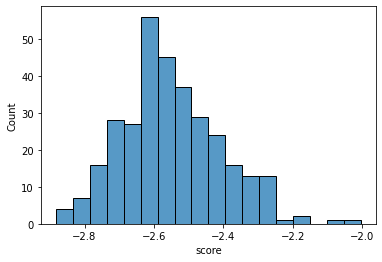

In [16]:
full_df = bin_stats('output/Full_GAN/scoreList/t1_')

total struct: 7605
median is -2.408854007382628
number of unique structs is 297
-2.5732129953357523


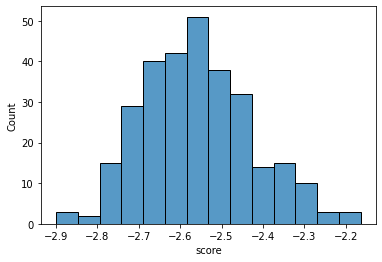

In [19]:
g278_df = bin_stats('output/278_GAN/t1/')

In [61]:
se = df.copy()

se['Full GAN:Best Loop'] = full_df['score']
se['278_GAN: Best Loop'] = g278_df['score']

In [62]:
se = se.dropna(how='any')

In [63]:
se = se.rename(columns={"original": "Reference Proteins", "actual": "Reference Sequence:Relax",})

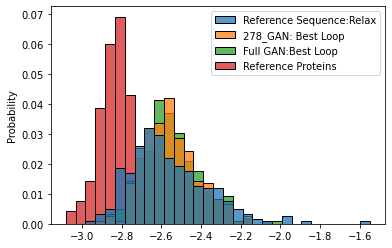

In [67]:
hist11 = sns.histplot(data=se[['Reference Proteins',"Reference Sequence:Relax",'Full GAN:Best Loop','278_GAN: Best Loop']],stat='probability',hue_order=["Reference Sequence:Relax",'278_GAN: Best Loop','Full GAN:Best Loop',"Reference Proteins"])
hist11.figure.savefig(f'../Figures/GraphGen_Figure/DesignGAN_Output.svg')
hist11.figure.savefig(f'../Figures/GraphGen_Figure/DesignGAN_Output.png')

In [286]:
get_time('output/Full_GAN/scoreList/t1_')

total struct: 9952
median time is 12.607028365135193
time per best structure is 6.8min


In [287]:
get_time('output/Full_GAN/scoreList/t2_')

total struct: 9628
median time is 12.547322630882263
time per best structure is 6.3min


In [288]:
get_time('output/Full_GAN/scoreList/t3_')

total struct: 10197
median time is 12.407009601593018
time per best structure is 6.7min


In [294]:
get_time('output/278_GAN/t1/')

total struct: 7605
median time is 14.306405544281006
time per best structure is 6.3min


In [302]:
get_time('output/278_GAN/t2/')

total struct: 8684
median time is 14.220554828643799
time per best structure is 6.7min


In [291]:
get_time('output/278_GAN/t3/')

total struct: 7796
median time is 14.24651026725769
time per best structure is 5.9min


total struct: 9952
median is -2.385097082276594
-2.571958800396061


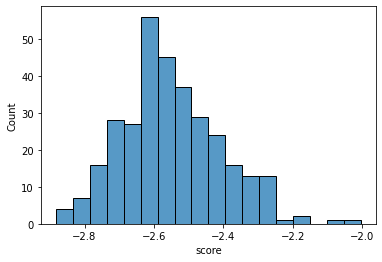

In [229]:
bin_stats('output/Full_GAN/scoreList/t1_')

total struct: 9628
median is -2.3950567194587054
-2.553054699592517


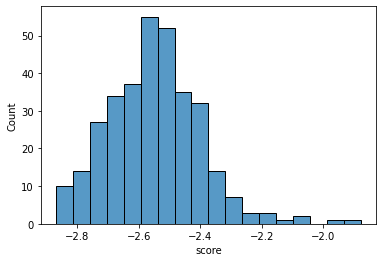

In [230]:
bin_stats('output/Full_GAN/scoreList/t2_')

total struct: 10197
median is -2.387544131193447
-2.5586775709956875


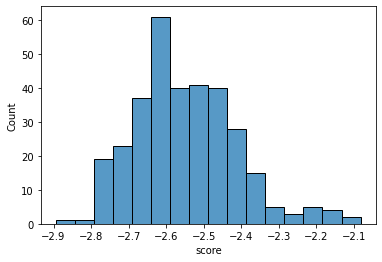

In [231]:
bin_stats('output/Full_GAN/scoreList/t3_')

total struct: 7605
median is -2.408854007382628
number of unique structs is 297
-2.5732129953357523


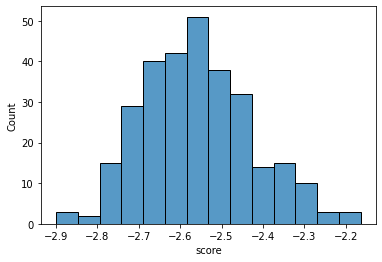

In [296]:
bin_stats('output/278_GAN/t1/')

total struct: 8424
median is -2.416577235046838
number of unique structs is 304
-2.584544902260212


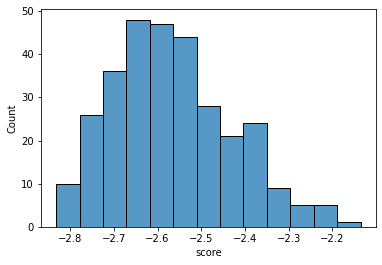

In [297]:
bin_stats('output/278_GAN/t2/')

total struct: 7828
median is -2.4129282889167536
number of unique structs is 322
-2.5786964784302064


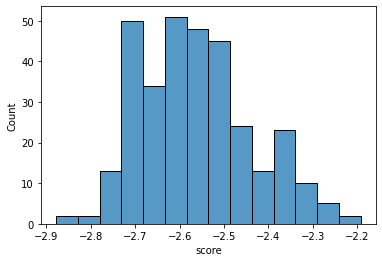

In [298]:
bin_stats('output/278_GAN/t3/')

total struct: 9952
median is 68.0


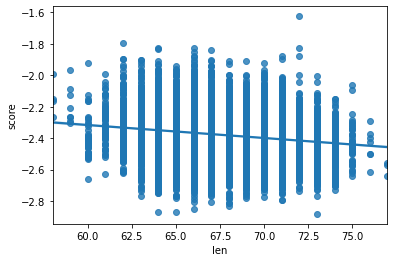

In [261]:
single_stats('output/Full_GAN/scoreList/t1_',stat='len')

total struct: 9628
median is 67.0


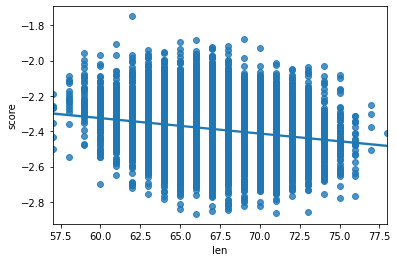

In [262]:
single_stats('output/Full_GAN/scoreList/t2_',stat='len')

total struct: 10197
median is 68.0


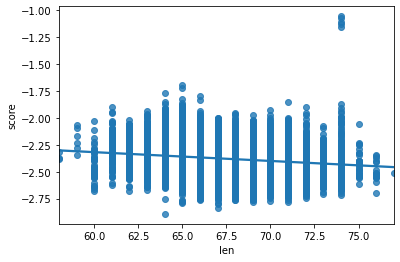

In [263]:
single_stats('output/Full_GAN/scoreList/t3_',stat='len')

total struct: 7605
median len is 70.0


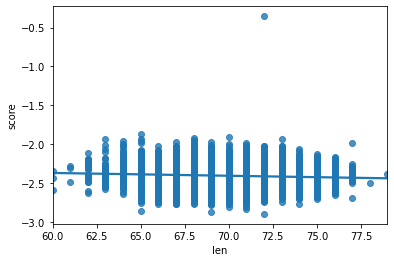

In [299]:
single_stats('output/278_GAN/t1/',stat='len')

total struct: 8425
median len is 70.0


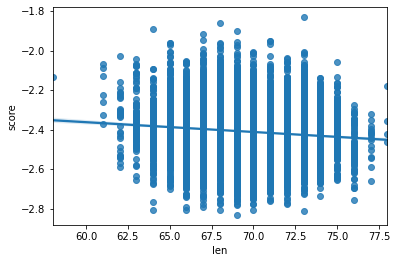

In [300]:
single_stats('output/278_GAN/t2/',stat='len')

total struct: 7828
median len is 69.0


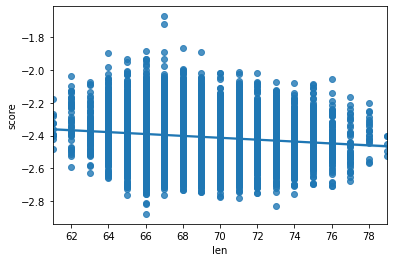

In [301]:
single_stats('output/278_GAN/t3/',stat='len')

total struct: 9628
median is -2.3950567194587054
-2.553054699592517


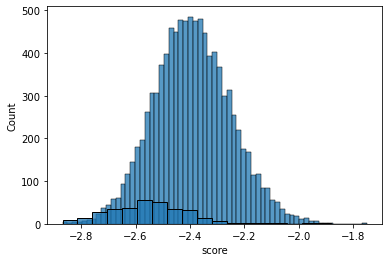

In [104]:
score_stats('output/Full_GAN/scoreList/t2_')

total struct: 9628
median is 0.69395312666893


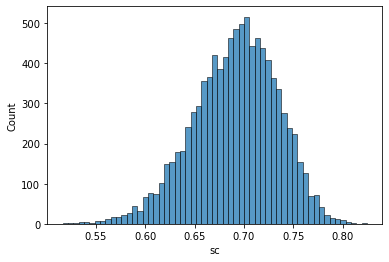

In [105]:
single_stats('output/Full_GAN/scoreList/t2_',stat='len')

total struct: 10197
median is -2.387544131193447
-2.5586775709956875


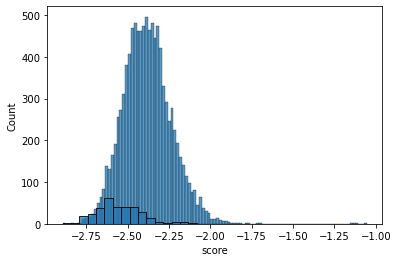

In [106]:
score_stats('output/Full_GAN/scoreList/t3_')

total struct: 10197
median is 0.6979733109474182


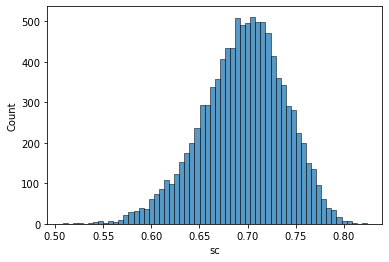

In [98]:
single_stats('output/Full_GAN/scoreList/t3_',stat='sc')

total struct: 3799
median is -2.40316245204587
-2.5796977803492087


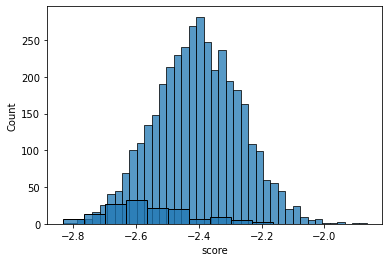

In [175]:
score_stats(iN = 'output/278_GAN/t1/')

total struct: 4836
median is -2.418866927910903
-2.5853896948343946


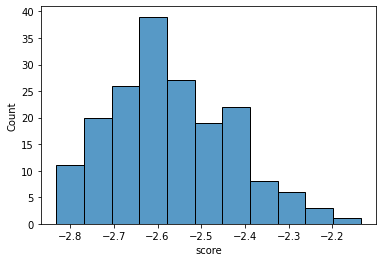

In [223]:
bin_stats(iN = 'output/278_GAN/t2/',stat='score')

total struct: 4809
median is -2.41180170912027
-2.5698549933399555


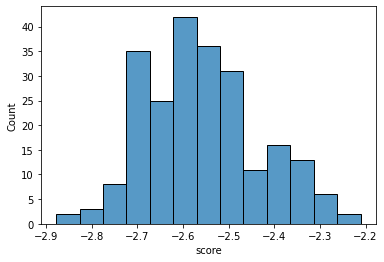

In [224]:
bin_stats(iN = 'output/278_GAN/t3/',stat='score')

total struct: 4809
median is -2.41180170912027
-2.5698549933399555


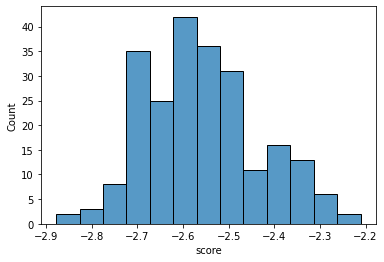

In [225]:
bin_stats(iN = 'output/278_GAN/t3/',stat='score')

total struct: 1472
median is 72.0


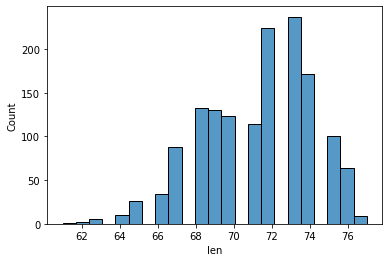

In [118]:
single_stats(iN = 'output/278_GAN/t1/',stat='len')

total struct: 4835
median is -2.418731073555945
-2.5853896948343946


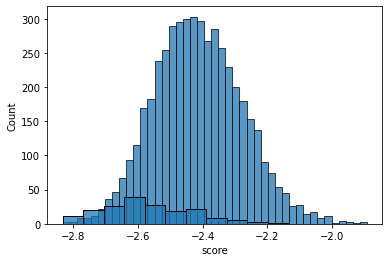

In [219]:
score_stats(iN = 'output/278_GAN/t2/')

total struct: 4835
median is 70.0


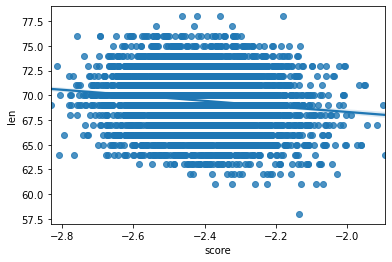

In [220]:
single_stats(iN = 'output/278_GAN/t2/',stat='len')

total struct: 4808
median is -2.4117714233787306
-2.5698549933399555


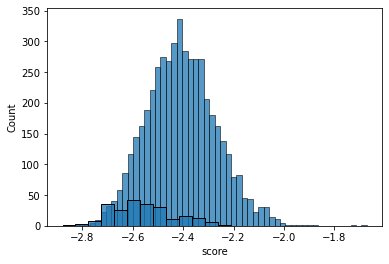

In [221]:
score_stats(iN = 'output/278_GAN/t3/')

total struct: 4808
median is 69.0


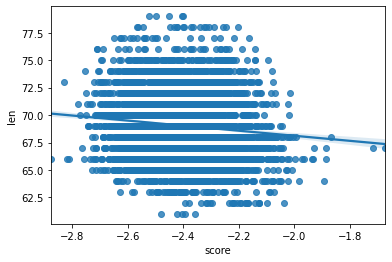

In [222]:
single_stats(iN = 'output/278_GAN/t3/',stat='len')

In [66]:
nL,sL = openArray(direc='output/Full_GAN/t1')

In [67]:
len(sL)

1963

In [69]:
sL = extract_total_score(sL,dictPlace=[2])

In [70]:
b=[]
for x in range(len(sL)):
    name = nL[x][0].split('_')
    num = int(name[0][1:])
    b.append([sL[x][0],num,nL[x][0]])
    

In [71]:
labels=['score','num','name']

In [72]:
df = pd.DataFrame(b,columns=labels)

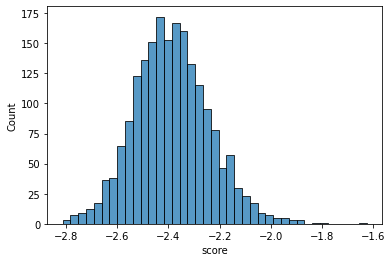

In [73]:
his4 = sns.histplot(data=df['score'])

In [74]:
df['score'].median()

-2.3912749358339003

In [75]:
len(np.unique(df['num'].to_numpy()))

58

In [76]:
sList=[]
for x in range(len(b)):
    s=df.loc[df['num']==x].min()['score']
    if not math.isnan(s):
        sList.append([s,x])

In [77]:
l3 = ['score','build']

In [78]:
#df = pd.DataFrame(b,columns=labels)
df2 = pd.DataFrame(sList,columns=l3)

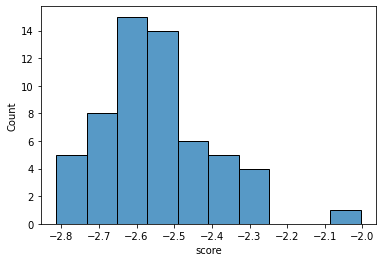

In [79]:
his4 = sns.histplot(data=df2['score'])
# his4.figure.savefig(f'../Figures/GraphGen_Figure/generated.png')
# his4.figure.savefig(f'../Figures/GraphGen_Figure/generated.svg')

In [81]:
df2['score'].median()

-2.5688841433877165

In [524]:
nL,sL = openArray(direc='output/278_GAN/')


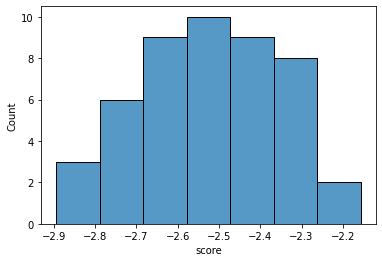

In [498]:
sL = extract_total_score(sL,dictPlace=[2])
b=[]
for x in range(len(sL)):
    name = nL[x][0].split('_')
    num = int(name[0][1:])
    if len(sL[x]) == 0:
        sL[x]=[math.nan]
    b.append([sL[x][0],num,nL[x][0]])

labels=['score','num','name']
l3 = ['score','build']
df = pd.DataFrame(b,columns=labels)
sList=[]
for x in range(len(b)):
    s=df.loc[df['num']==x].min()['score']
    if not math.isnan(s):
        sList.append([s,x])
df2 = pd.DataFrame(sList,columns=l3)
his4 = sns.histplot(data=df2['score'])

In [499]:
df['score'].median()

-2.392069892589542

In [500]:
sL[2]

[-2.2393215966526823]

In [501]:
df2['score'].median()

-2.5185667296041294

In [134]:
import os
dire = 'output/Full_GAN/t3'
fL = os.listdir(dire)
print(len(fL))

10199


In [148]:
#split nL, sL
nL,sL = openArray(direc='output/Full_GAN/t3')
print(f'total struct: {len(sL)}')

total struct: 29777


In [149]:
t1=9952
t2=19580
t3=29777

In [153]:
sL1 = sL[:t1]
sL2 = sL[t1:t2]
sL3 = sL[t2:t3]

nL1 = nL[:t1]
nL2 = nL[t1:t2]
nL3 = nL[t2:t3]

In [154]:
def save_scoreList(nameList=[],scoreList=[],direc='output/Aug9/'):

    with open(f'{direc}nameList.pkl',"wb") as f:
        pickle.dump(nameList,f)

    with open(f'{direc}scoreList.pkl',"wb") as f:
        pickle.dump(scoreList,f)

In [155]:
save_scoreList(nL1,sL1,direc='output/Full_GAN/scoreList/t1_')

In [156]:
save_scoreList(nL2,sL2,direc='output/Full_GAN/scoreList/t2_')

In [157]:
save_scoreList(nL3,sL3,direc='output/Full_GAN/scoreList/t3_')

In [268]:
import os

fL = os.listdir('../output/278_GAN/t3/')
print(len(fL))

7977
